| Question                                                                                                 | Can it answer? | New relations? | New opportunities? |
| -------------------------------------------------------------------------------------------------------- | -------------- | -------------- | ------------------ |
| Is the handover regular among doctors?                                                               |                |                |                    |
| What is the quality of the handover in its current unstructured form when compared to the SBAR standard? |                |                |                    |
| Is handover attended by all members of junior staff?                                                     |                |                |                    |
| What are reasons for delayed/interrupted handover?                                                       |                |                |                    |
| What are the preferred methods of handover among junior doctors?                                         |                |                |                    |
| Does the choice of handover method impact its quality?                                                   |                |                |                    |

In [80]:
import pandas as pd

df = pd.read_excel(r'C:\Users\abdul.wasay\Documents\minal_ahmad\Data form (Responses).xlsx', engine='openpyxl')
df.head(3)


,Timestamp,Date,Handover Type,Method of delivering information,Time at the start of Handover,Time at the end of Handover,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending,Designation of doctor presenting,Designation of Antendees,Absent from meeting,Description of SITUATION,Description of BACKGROUND,Description of ASSESSMENT,Description of RECOMMENDATION,Interruption during handover
0,2024-08-14 16:38:49.777,2024-08-08,Morning,"Verbal, Bluespeir",08:00:00,09:00:00,34.0,10.0,10.0,"SHO, REGISTRAR","SHO, FY2, Registrar, Comsultant",NaN,Good,Good,Good,Excellent,NaN
1,2024-09-16 18:41:14.723,2024-08-08,Evening,Hand Written Note,17:00:00,17:05:00,4.0,10.0,1.0,SHO,SHO,"On Call SHO, On Call Registrar, Outliers SHO, ...",Good,Poor,Poor,Good,Nil
2,2024-10-20 12:52:13.667,2024-08-08,Night,"Hand Written Note, Verbal",20:10:00,20:25:00,5.0,3.0,2.0,SHO,SHO,On Call Registrar,Very Good,Good,Very Good,Good,Nil


In [81]:
# Assuming df is your DataFrame
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('string')
# Verify the conversion
print("\n\n dtypes:\n\n",df.dtypes)

df.describe()




 dtypes:

 Timestamp                                   datetime64[ns]
Date                                        datetime64[ns]
Handover Type                               string[python]
Method of delivering information            string[python]
Time at the start of Handover               string[python]
Time at the end of Handover                 string[python]
No. Of cases discussed                             float64
Total Number of doctors present on shift           float64
Number of staff attending                          float64
Designation of doctor presenting            string[python]
Designation of Antendees                    string[python]
Absent from meeting                         string[python]
Description of SITUATION                    string[python]
Description of BACKGROUND                   string[python]
Description of ASSESSMENT                   string[python]
Description of RECOMMENDATION               string[python]
Interruption during handover               

,Timestamp,Date,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending
count,52,52,49.000000,50.000000,50.000000
mean,2024-10-17 22:44:25.750788352,2024-08-18 12:00:00,14.346939,6.720000,4.580000
min,2024-08-14 16:38:49.777000,2024-08-08 00:00:00,0.000000,3.000000,0.000000
25%,2024-10-20 12:52:13.667000064,2024-08-12 18:00:00,4.000000,3.000000,2.250000
50%,2024-11-01 03:36:30.276500224,2024-08-18 12:00:00,6.000000,8.000000,3.000000
75%,2024-11-08 11:54:10.377999872,2024-08-24 06:00:00,30.000000,10.000000,7.000000
max,2024-11-08 12:48:25.470000,2024-08-29 00:00:00,60.000000,12.000000,10.000000
std,NaN,NaN,15.289636,3.136617,2.741145


In [82]:
print("nulls? \n\n", df.isnull().sum(),"\n\nduplications? \n\n" ,df.duplicated().sum())

nulls? 

 Timestamp                                    0
Date                                         0
Handover Type                                0
Method of delivering information             0
Time at the start of Handover                3
Time at the end of Handover                  3
No. Of cases discussed                       3
Total Number of doctors present on shift     2
Number of staff attending                    2
Designation of doctor presenting             3
Designation of Antendees                     2
Absent from meeting                         19
Description of SITUATION                     2
Description of BACKGROUND                    2
Description of ASSESSMENT                    2
Description of RECOMMENDATION                2
Interruption during handover                22
dtype: int64 

duplications? 

 0


C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_17480\1556277354.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_17480\1556277354.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_dt'] = pd.to_datetime(df['Time at the end of Handover'])


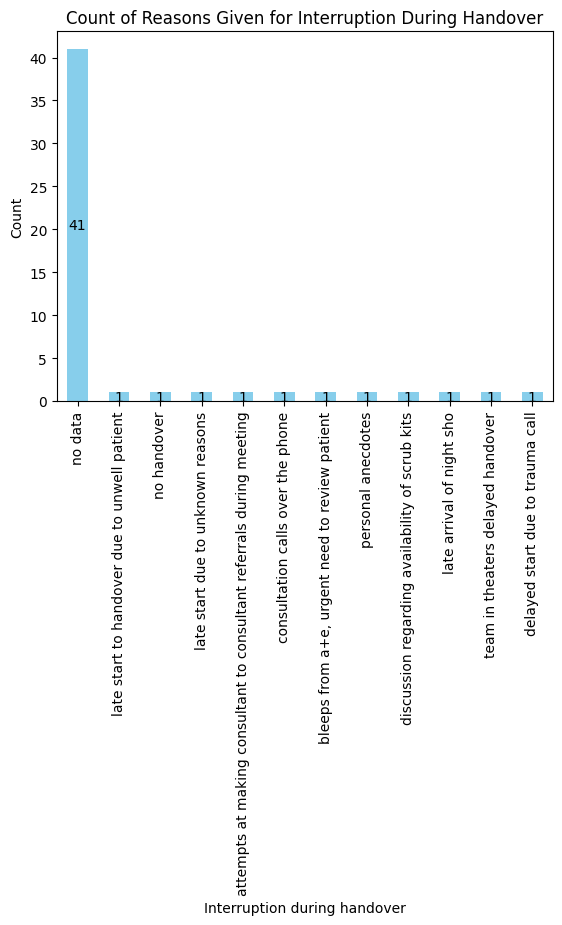

In [93]:
import datetime as dt

from matplotlib import pyplot as plt

df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
df['end_dt'] = pd.to_datetime(df['Time at the end of Handover'])
df['Duration between handovers'] = df['end_dt'] - df['start_dt']
df.columns

# Clean data in 'Interruption during handover' column
df['Interruption during handover'] = df['Interruption during handover'].str.strip().str.lower().fillna('no data')
df['Interruption during handover'] = df['Interruption during handover'].replace(['nil', 'none'], 'no data')
# Ensure 'Interruption during handover' column contains strings
df['Interruption during handover'] = df['Interruption during handover'].astype(str)

# Create a histogram showing a simple count of reasons given or not
df['Interruption during handover'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Interruption during handover')
plt.ylabel('Count')
plt.title('Count of Reasons Given for Interruption During Handover')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center')
plt.show()

Proportion of rows containing 'SHO, FY2': 0.40


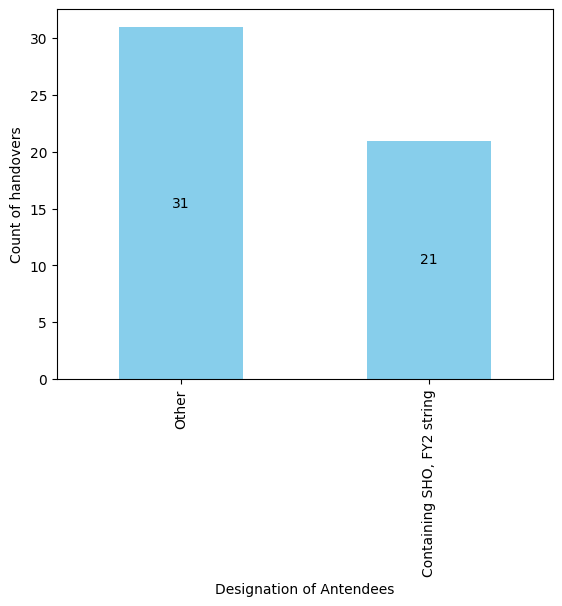

In [76]:
import matplotlib.pyplot as plt

# Ensure 'Designation of Antendees' column contains strings
df['Designation of Antendees'] = df['Designation of Antendees'].astype(str)

# Calculate the proportion of rows where 'Designation of Antendees' contains 'SHO, FY2'
proportion_sho_fy2 = df['Designation of Antendees'].str.contains('SHO, FY2').mean()
print(f"Proportion of rows containing 'SHO, FY2': {proportion_sho_fy2:.2f}")

# Categorize 'SHO, FY2' into a single category and label every other category as "Other"
df['Designation of Antendees'] = df['Designation of Antendees'].apply(lambda x: 'Containing SHO, FY2 string' if 'SHO, FY2' in x else 'Other')

# Plot the updated designation counts
counts = df['Designation of Antendees'].value_counts()
ax = counts.plot(kind='bar', color='skyblue')
plt.xlabel('Designation of Antendees')
plt.ylabel('Count of handovers')

# Show the number on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center')

plt.show()

C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_17480\3771258391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junior_docs['Delayed'] = junior_docs['start_dt'].dt.minute != 0


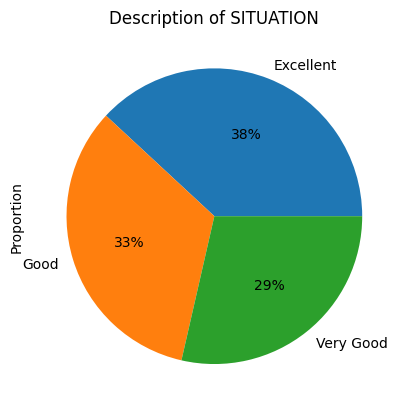

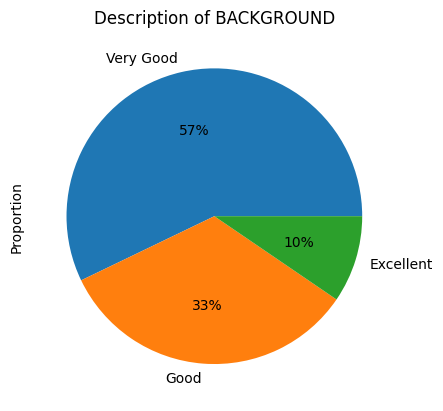

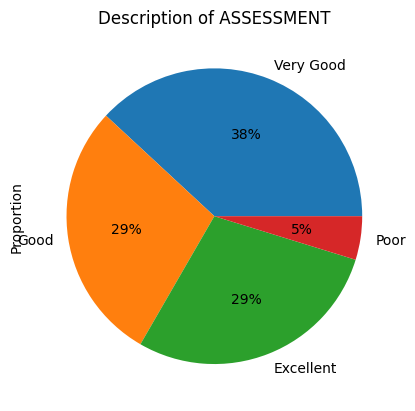

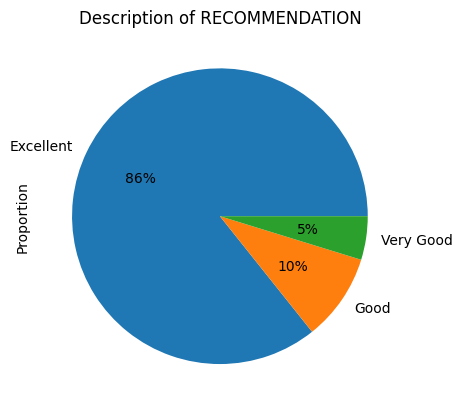

In [49]:
# filter by FY2 in designation of attendees column and then group by date and count the number of staff attending
junior_docs = df[df['Designation of Antendees'].str.contains('SHO, FY2')]

# Add boolean column that if the column time is delayed from o'clock mark, then it is true else false

junior_docs['Delayed'] = junior_docs['start_dt'].dt.minute != 0
junior_docs



description_columns = [col for col in junior_docs.columns if 'Description' in col]
for col in description_columns:
    (junior_docs[col].value_counts(normalize=True) * 100).plot(kind='pie', title=col, autopct='%1.00f%%')
    plt.ylabel('Proportion')
    plt.show()